In [13]:
from keras.datasets import mnist
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
import time
warnings.filterwarnings('ignore')

(x_train, y_train), (z_test, y_test) = mnist.load_data()

X = np.zeros((x_train.shape[0], 784))
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()
X = pd.DataFrame(X)
print(X.shape)
Y = pd.DataFrame(y_train)
Y.head()
X = X.sample(frac=0.1, random_state=10)
Y = Y.sample(frac=0.1, random_state=10)
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)
X.shape
Y.shape
df = X

(60000, 784)


Время t-SNE:  80.96319603919983


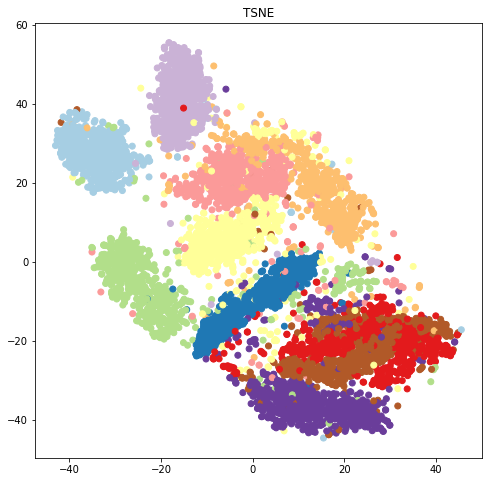

In [ ]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, perplexity=105, random_state=123)
tsne_results = tsne.fit_transform(df.values)
df['label'] = Y

print ('Время t-SNE: ', time.time()-time_start)

fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'], 
    cmap=plt.cm.get_cmap('Paired'))
plt.show()

In [25]:
!pip install umap umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached umap-0.1.1-py3-none-any.whl


In [8]:
import umap.umap_ as umap

Время UMAP:  37.976094007492065


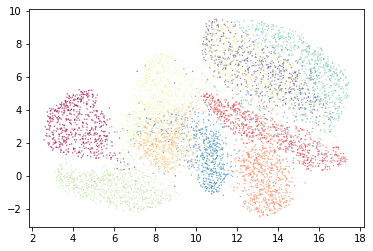

In [20]:
time_start = time.time()
fit = umap.UMAP(n_neighbors=55, min_dist=0.6, random_state=123)
u = fit.fit_transform(X)
print ('Время UMAP: ', (time.time()-time_start))

plt.scatter(u[:,0], u[:,1], c=Y, cmap="Spectral", s=0.1)